# LSTM (Long Short-Term Memory) for a sine wave
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
seed = 101
keras.utils.set_random_seed(seed)

## Create some sinusoidal training and test data

In [2]:
X_train = np.arange(0,100,0.5)
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5)
y_test = np.sin(X_test)

n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

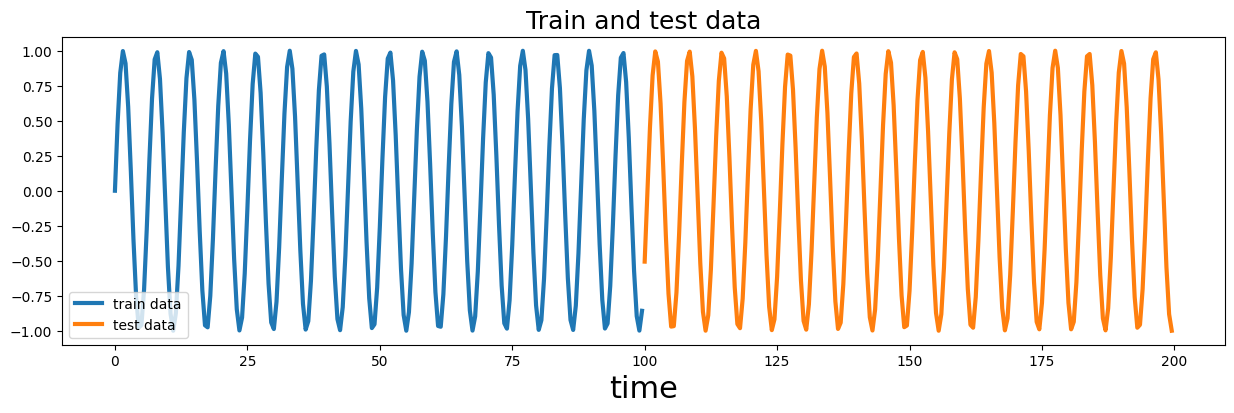

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.set_title("Train and test data", fontsize= 18)
ax.set_xlabel("time", fontsize= 22)
ax.legend(loc="lower left")
plt.show();

## [`TimeseriesGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator)

In [4]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

look_back  = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1 )

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1 )

## The LSTM model

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import Input

n_neurons  = 2

model = Sequential()
model.add(Input(shape=(look_back, n_features)))
model.add(LSTM(n_neurons))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse')

### Fit and predict

In [6]:
initial_weights = model.get_weights()

model.fit(train_generator,
          epochs=300,
          verbose=None)

test_predictions  = model.predict(test_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Results

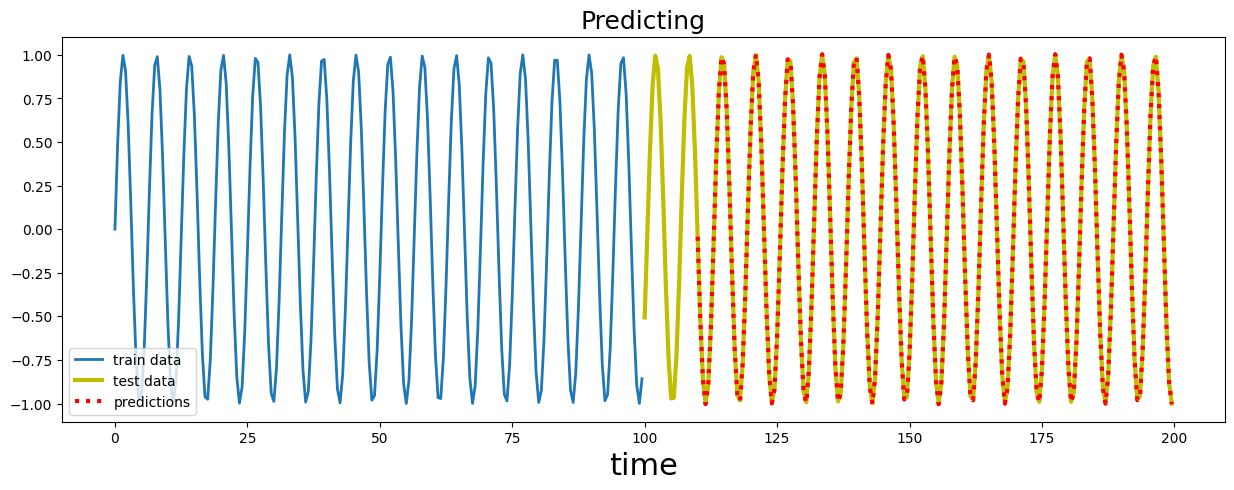

In [7]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.set_title("Predicting", fontsize= 18)
ax.set_xlabel("time", fontsize= 22)
ax.legend(loc="lower left")
plt.show();

## Extrapolation

In [8]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(180):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value)
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)


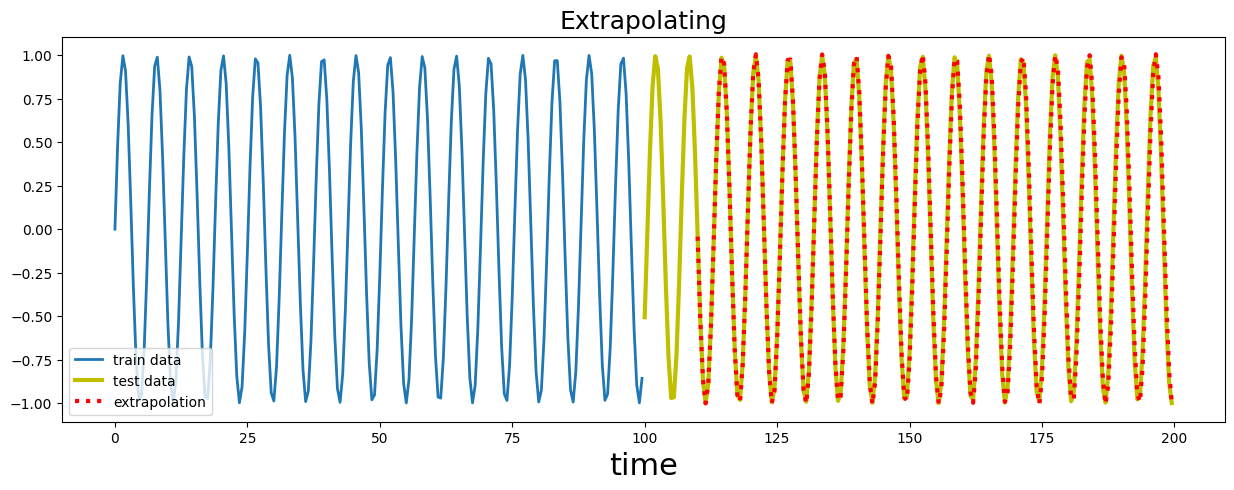

In [9]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation')
ax.set_title("Extrapolating", fontsize= 18)
ax.set_xlabel("time", fontsize= 22)
ax.legend(loc="lower left")
plt.show();

## Let us complicate things a little by now adding the third and fifth harmonics to the input data
Generate the data:

In [10]:
X_train = np.arange(0,50,0.5)
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5)
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

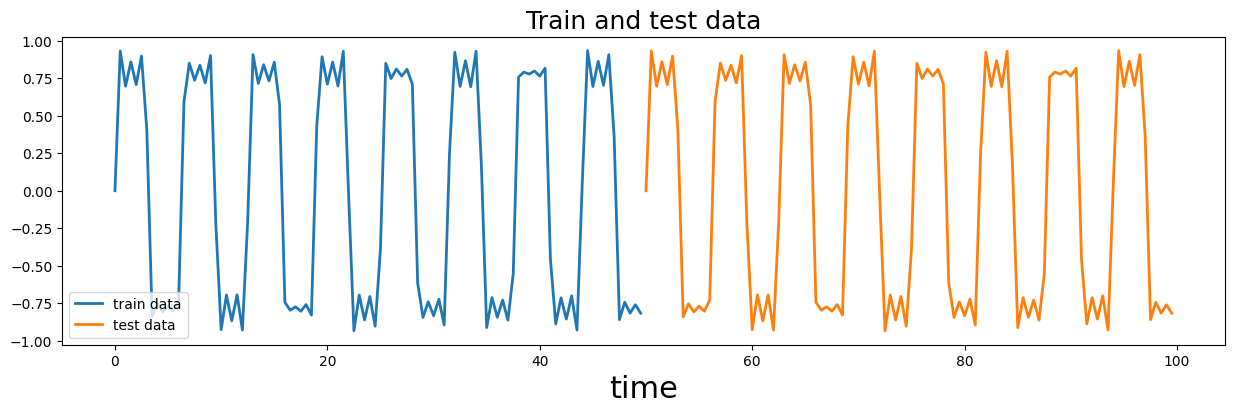

In [11]:
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.set_title("Train and test data", fontsize= 18)
ax.set_xlabel("time", fontsize= 22)
ax.legend(loc="lower left")
plt.show();

In [12]:
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

In [13]:
model.set_weights(initial_weights)
model.fit(train_generator,
          epochs =  1000,
          verbose = None)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


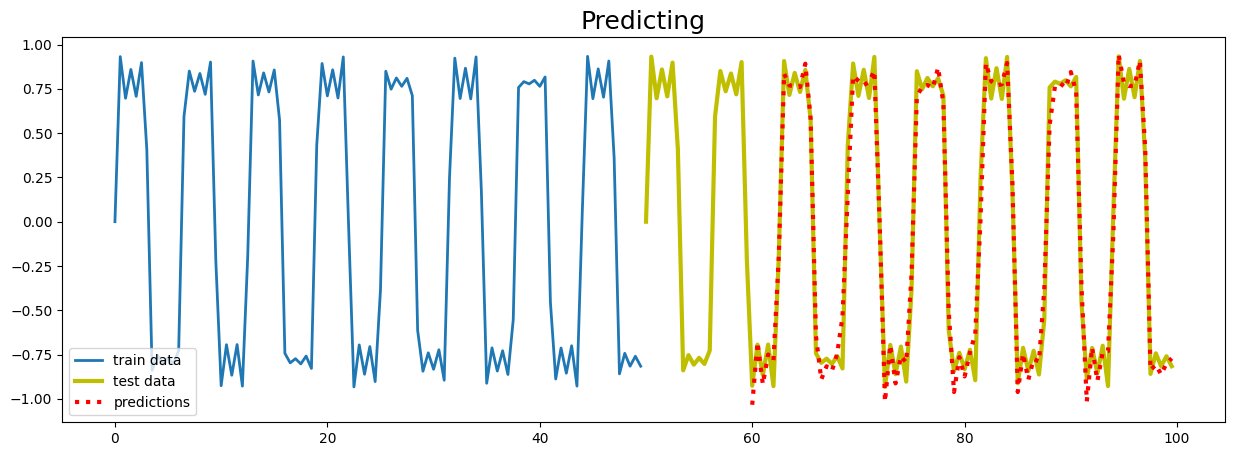

In [14]:
test_predictions = model.predict(test_generator)
x = np.arange(60,100,0.5)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.set_title("Predicting", fontsize= 18)
ax.legend(loc="lower left")
plt.show();

In [15]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(400):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value)
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

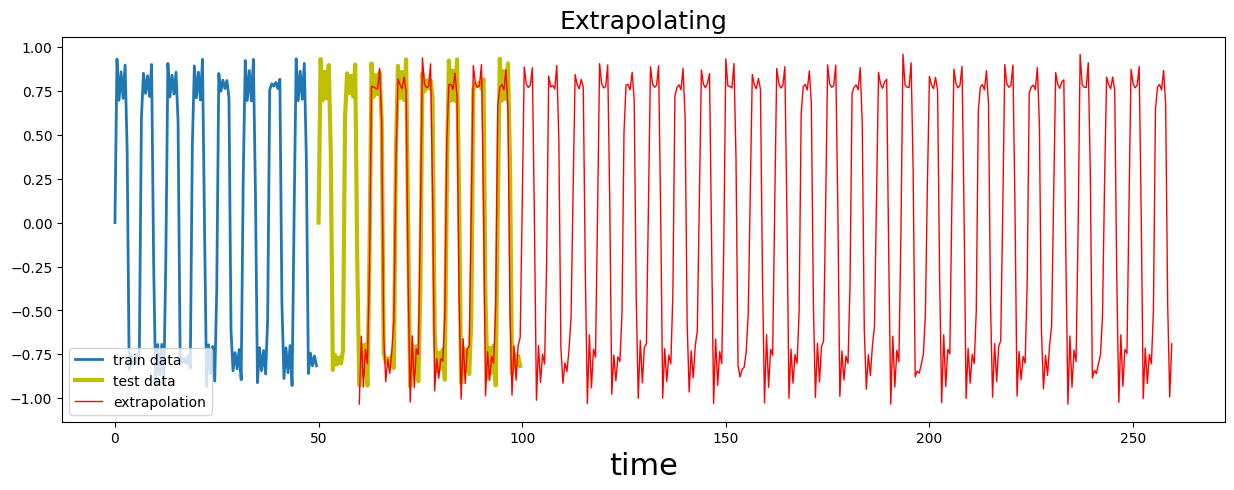

In [16]:
# plot
x = np.arange(60,260,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=1, c='r', label='extrapolation')
ax.set_title("Extrapolating", fontsize= 18)
ax.set_xlabel("time", fontsize= 22)
ax.legend(loc="lower left")
plt.show();